In [17]:
! pip install matplotlib datasets wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./curated_data_v2.csv")

In [3]:
df.head()

,Unnamed: 0,Rating,title,date,stock
0,128942.0,NaN,"The Unusual Suspects (AIG, AZN, BRK-A, BRK-B, ...",2010-05-29 10:34:00-04:00,AZN
1,128943.0,N,Look for Opportunity 05-25-2010,2010-05-25 17:55:00-04:00,AZN
2,128944.0,G,Citi Raises Forecasts for AstraZeneca (AZN),2010-05-24 14:37:00-04:00,AZN
3,128945.0,G,FDA Approves AstraZeneca (AZN) And Pozen (POZN...,2010-04-30 18:15:00-04:00,AZN
4,128946.0,N,Afternoon Market Update - Goldman Sachs (NYSE:...,2010-04-28 15:28:00-04:00,AZN


In [4]:
df['Rating'] = df['Rating'].str.upper()

In [5]:
fdf = df[df['Rating'].isin(['G','B','N'])][['title', 'Rating']]

In [6]:
fdf = fdf.rename(columns={'title':'sentence', 'Rating':'label'})

In [7]:
fdf.head()

,sentence,label
1,Look for Opportunity 05-25-2010,N
2,Citi Raises Forecasts for AstraZeneca (AZN),G
3,FDA Approves AstraZeneca (AZN) And Pozen (POZN...,G
4,Afternoon Market Update - Goldman Sachs (NYSE:...,N
5,Whistleblower Gets Rewarded In AstraZeneca Cas...,G


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [10]:
for train_index, test_index in sss.split(fdf.sentence.values, fdf.label.values):
    df_train = fdf.iloc[train_index]
    df_test = fdf.iloc[test_index]

In [11]:
df_train.to_csv("train_small_v4.csv", index=False)

In [12]:
df_test.to_csv("test_small_v4.csv", index=False)

In [13]:
df_test.label.value_counts()

N    57
G    47
B    21
Name: label, dtype: int64

In [14]:
df_train.label.value_counts()

N    226
G    190
B     82
Name: label, dtype: int64

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud
import os
from os import path
from wordcloud import WordCloud

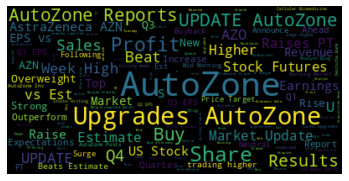

In [19]:
sentences = fdf[fdf['label'] == 'G'].sentence.to_list()
text = " ".join(sentences)
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

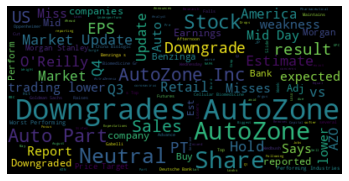

In [20]:
sentences = fdf[fdf['label'] == 'B'].sentence.to_list()
text = " ".join(sentences)
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

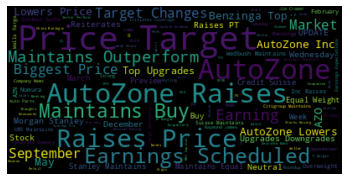

In [21]:
sentences = fdf[fdf['label'] == 'N'].sentence.to_list()
text = " ".join(sentences)
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()